In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
dataset_url =  "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =tf.keras.utils.get_file('flower_photo', origin = dataset_url, cache_dir = ".", untar = True)

In [5]:
data_dir

'.\\datasets\\flower_photo'

In [11]:
# converting the datsetset floder path to window path
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photo')

In [17]:
#this will list all the image in jpg format
print(list(data_dir.rglob('*.jpg')))#this will list all the image in jpg format
print(list(data_dir.rglob('*.jpg')))

[]


In [20]:
import tensorflow as tf
from pathlib import Path

# Download and extract flower dataset
data_dir = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    fname='flower_photos',
    untar=True
)

# Convert to Path object
data_dir = Path(data_dir)

# Check a few images
image_paths = list(data_dir.glob('*/*.jpg'))
print(f"Total images found: {len(image_paths)}")
print(image_paths[:5])


228813984/228813984 [==============================] - 48s 0us/step
Total images found: 3670
[WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]


In [21]:
#this will list all the image in jpg format
print(list(data_dir.rglob('*.jpg')))

[WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'), WindowsPath('C:/Users/thent/.keras/datasets/flower_p

In [24]:
#this will give length of list of all the image in jpg format
image_count = len(list(data_dir.rglob('*.jpg')))

In [28]:
# if we to get the rose image 
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

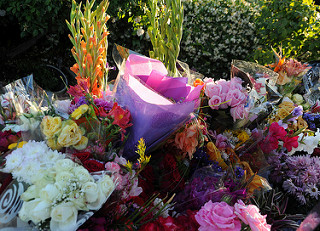

In [32]:
# Opening the image
PIL.Image.open(str(roses[3]))

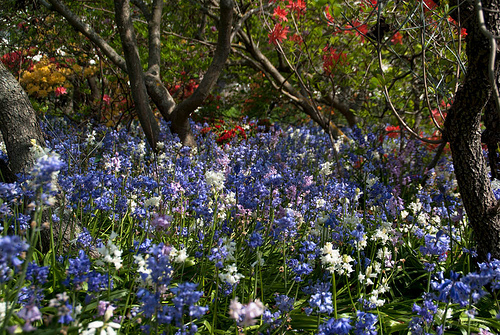

In [34]:
# if we to get the rose image 
tulip = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulip[1]))

In [60]:
# lets create a dictionary for each type of flower
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'tulip': list(data_dir.glob('tulips/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'daisy': list(data_dir.glob('daisy/*'))
}


In [61]:
# to fetch the window path of daisy
flower_image_dict['daisy']

[WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('C:/Users/thent/.keras/dataset

In [63]:
# lets label each flower
flower_label_dict = {
    'roses' : 0,
    'tulip' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'daisy' : 4
}

In [64]:
# getting the path through the dictionry
flower_image_dict['daisy'][0]

WindowsPath('C:/Users/thent/.keras/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [65]:
str(flower_image_dict['daisy'][0])

'C:\\Users\\thent\\.keras\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [66]:
# read tge image and convert it into 3d numpy array
img = cv2.imread(str(flower_image_dict['daisy'][0]))

In [67]:
img.shape

(263, 320, 3)

In [68]:
# lets resize the image to standard size
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [69]:
# to print the no of image for each flower
for flower_name, image in flower_image_dict.items():
    print(f"{flower_name} : {len(image)}")
    

roses : 641
tulip : 799
dandelion : 898
sunflowers : 699
daisy : 633


In [70]:
X, Y = [], []
for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        Y.append(flower_label_dict[flower_name])

In [76]:
# lets convert the x and y to numpy array
X = np.array(X)
Y = np.array(Y)

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

In [78]:
len(x_train)

2752

In [80]:
len(x_test)

918

In [82]:
# Now lets scale(normalize) the array 
x_train_scaled = x_train /255
x_test_scaled  = x_test / 255

In [85]:
num_classes = 5

In [90]:
# lets build the model (Convolution neural network)
model = Sequential([
    layers.Conv2D(16,3, padding = 'same', activation= 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding= 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(120, activation = 'relu'),
        layers.Dense(num_classes)
    
])

model.compile(optimizer = 'adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
             metrics = ['accuracy'])

model.fit(x_train_scaled, y_train, epochs = 40 )

Epoch 1/40
86/86 [==============================] - 109s 1s/step - loss: 1.4743 - accuracy: 0.3997
Epoch 2/40
86/86 [==============================] - 101s 1s/step - loss: 1.0310 - accuracy: 0.5948
Epoch 3/40
86/86 [==============================] - 104s 1s/step - loss: 0.8513 - accuracy: 0.6704
Epoch 4/40
86/86 [==============================] - 102s 1s/step - loss: 0.6701 - accuracy: 0.7453
Epoch 5/40
86/86 [==============================] - 109s 1s/step - loss: 0.4300 - accuracy: 0.8481
Epoch 6/40
86/86 [==============================] - 146s 2s/step - loss: 0.2579 - accuracy: 0.9186
Epoch 7/40
86/86 [==============================] - 161s 2s/step - loss: 0.1591 - accuracy: 0.9499
Epoch 8/40
86/86 [==============================] - 153s 2s/step - loss: 0.1020 - accuracy: 0.9720
Epoch 9/40
86/86 [==============================] - 119s 1s/step - loss: 0.0632 - accuracy: 0.9829
Epoch 10/40
86/86 [==============================] - 130s 2s/step - loss: 0.0366 - accuracy: 0.9884
Epoch 11/

In [93]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 12s 351ms/step - loss: 2.4390 - accuracy: 0.6275


[2.439008951187134, 0.6274510025978088]

In [96]:
prediction = model.predict(x_test_scaled)

29/29 [==============================] - 11s 350ms/step


In [100]:
score = tf.nn.softmax(prediction[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.7139566e-03, 2.9397136e-02, 1.5024362e-03, 9.6513259e-01,
       2.5392184e-04], dtype=float32)>

In [101]:
np.argmax(score)

3

In [102]:
y_test[0]

1

In [117]:
import matplotlib.pyplot as plt

index = 243  # You can change this to any valid index
image = x_test_scaled[index]
label = y_test[index]


In [118]:
# Model expects batch, so we add one dimension
prediction = model.predict(image[np.newaxis, ...])
predicted_class = np.argmax(prediction[0])


1/1 [==============================] - 0s 73ms/step


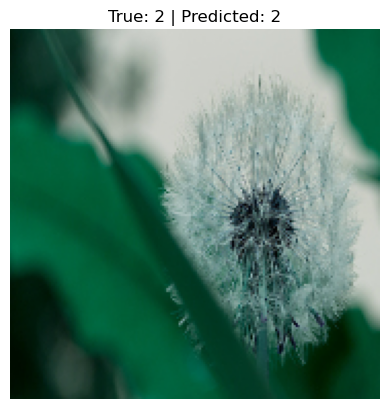

In [119]:
plt.imshow(image)
plt.title(f"True: {label} | Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [124]:
y_pred_probs = model.predict(x_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)  # get predicted class labels


29/29 [==============================] - 10s 344ms/step


In [127]:

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       176
           1       0.64      0.60      0.62       201
           2       0.69      0.66      0.67       215
           3       0.68      0.75      0.71       160
           4       0.58      0.55      0.57       166

    accuracy                           0.63       918
   macro avg       0.63      0.63      0.63       918
weighted avg       0.63      0.63      0.63       918



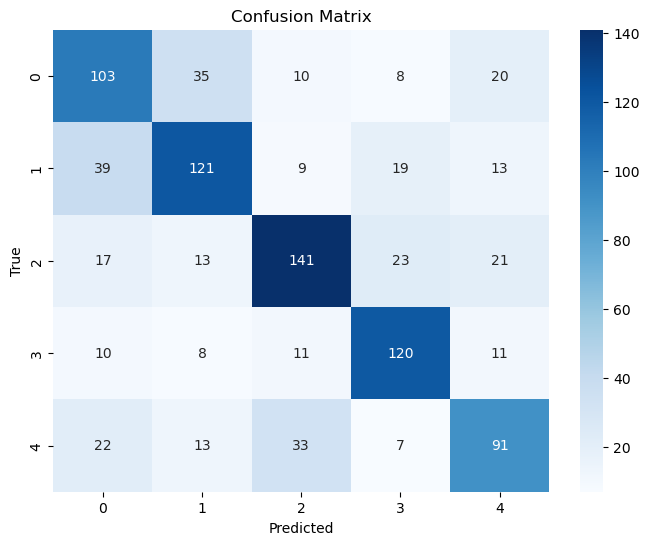

In [130]:

import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

